In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [11]:
df=pd.read_csv(r"C:\Users\Vansh\ADANIPORTS.csv")
df=df.drop(['Symbol'],axis=1)
df=df.drop(['Series'],axis=1)
df=df.drop(['Prev Close'],axis=1)
df=df.drop(['Last'],axis=1)
df=df.drop(['VWAP'],axis=1)
df=df.drop(['Turnover'],axis=1)
df=df.drop(['Trades'],axis=1)
df=df.drop(['Deliverable Volume'],axis=1)
df=df.drop(['%Deliverble'],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,03-01-2011,145.55,146.40,143.05,145.05,487210
1,04-01-2011,146.95,150.50,144.55,148.55,812777
2,05-01-2011,150.10,158.80,149.30,157.60,3254352
3,06-01-2011,158.30,160.00,154.00,154.95,1874274
4,07-01-2011,155.00,155.30,146.10,147.25,781973
...,...,...,...,...,...,...
2553,26-04-2021,733.00,739.65,728.90,730.75,9390549
2554,27-04-2021,735.00,757.50,727.35,749.15,20573107
2555,28-04-2021,755.00,760.00,741.10,746.25,11156977
2556,29-04-2021,753.20,765.85,743.40,746.75,13851910


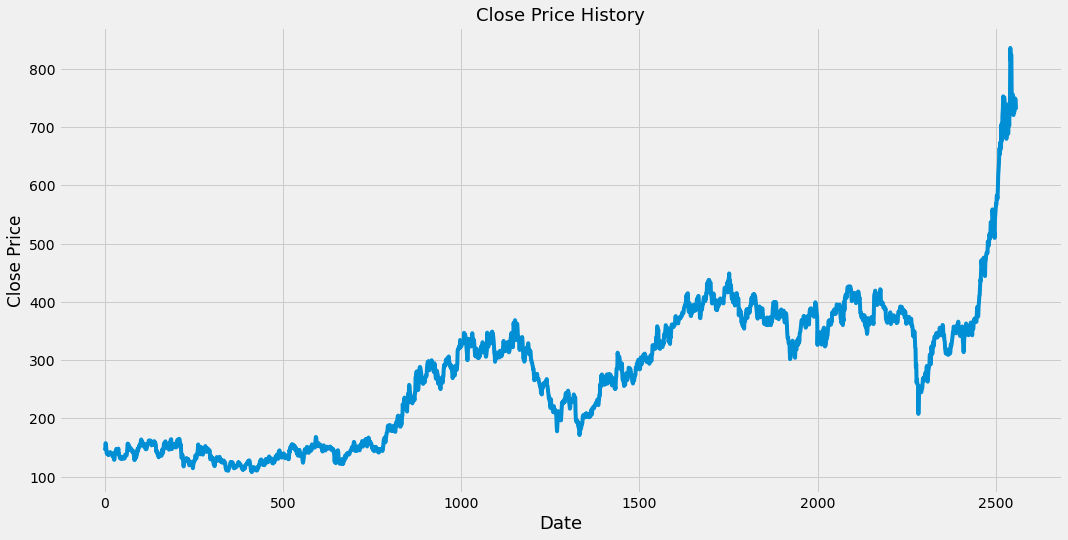

In [12]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [13]:
def SMA(data,period=30,column='Close'):
    return data[column].rolling(window=period).mean()

In [14]:
df['SMA20'] = SMA(df, 20)
df['SMA50'] = SMA(df, 50)

In [15]:
df['Signal'] = np.where(df['SMA20'] > df['SMA50'], 1, 0)
df['Position'] = df['Signal'].diff()

In [16]:
df['Buy']=np.where(df['Position']==1,df['Close'],np.nan)
df['Sell']=np.where(df['Position']==-1,df['Close'],np.nan)

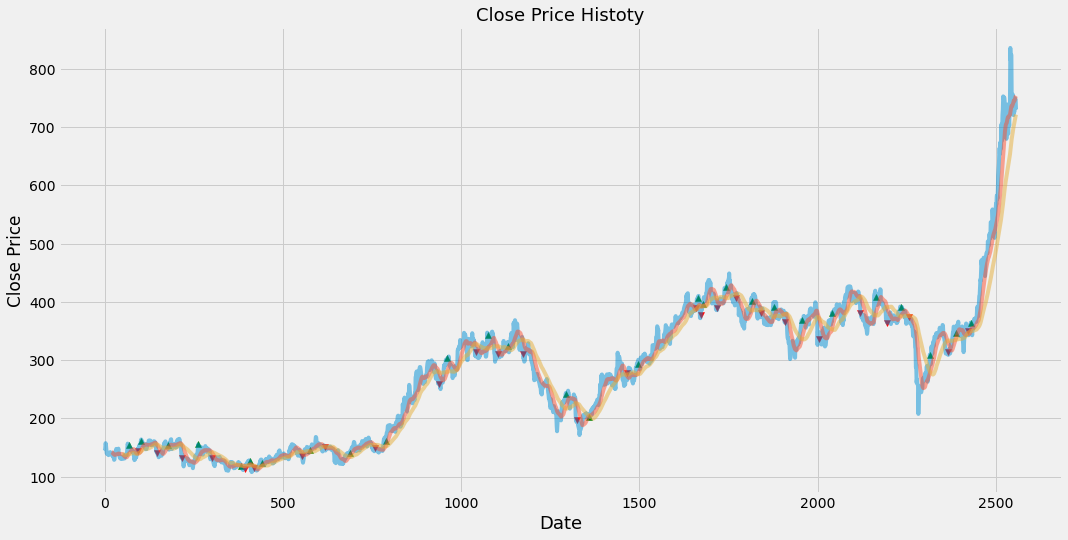

In [17]:
plt.figure(figsize=(16,8))
plt.title("Close Price Histoty",fontsize=18)
plt.plot(df['Close'],alpha=0.5,label='Close')
plt.plot(df['SMA20'],alpha=0.5,label='SMA 20')
plt.plot(df['SMA50'],alpha=0.5,label='SMA 50')
plt.scatter(df.index,df['Buy'],alpha=1,label='Buy Signal',marker='^',color='green')
plt.scatter(df.index,df['Sell'],alpha=1,label='Sell Signal',marker='v',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()